## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from typing import Tuple
import pandas_ta as ta

# visualization
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import mplfinance as mpf

# backtesting library
import vectorbt as vbt

# machine learning
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# get data from TradingView
from tvDatafeed import TvDatafeed, Interval
tv = TvDatafeed()

/Users/puwa/opt/anaconda3/envs/investic/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
you are using nologin method, data you access may be limited


## Import Data

In [2]:
raw_df = pd.read_csv("BTC_1H.csv", index_col="datetime")

# set index type as "datetime64[ns]"
raw_df.index = pd.to_datetime(raw_df.index)
raw_df

,symbol,open,high,low,close,volume
datetime,,,,,,
2022-01-01 07:00:00,BINANCE:BTCUSDT,46216.93,46731.39,46208.37,46656.13,1503.33095
2022-01-01 08:00:00,BINANCE:BTCUSDT,46656.14,46949.99,46574.06,46778.14,943.81539
2022-01-01 09:00:00,BINANCE:BTCUSDT,46778.14,46928.94,46721.96,46811.77,485.16860
2022-01-01 10:00:00,BINANCE:BTCUSDT,46811.77,46916.63,46760.12,46813.20,562.88971
2022-01-01 11:00:00,BINANCE:BTCUSDT,46813.21,46887.33,46591.23,46711.05,861.88389
...,...,...,...,...,...,...
2023-05-30 10:00:00,BINANCE:BTCUSDT,27783.43,27940.55,27773.69,27829.23,1430.88893
2023-05-30 11:00:00,BINANCE:BTCUSDT,27829.23,27848.09,27760.38,27776.19,733.62881
2023-05-30 12:00:00,BINANCE:BTCUSDT,27776.18,27776.19,27672.93,27753.38,969.42806


## Add technical indicators

In [7]:
strategy_name = "Demo Strategy"
strategy1 = ta.Strategy(
    name='Demo Strategy',
    description='',
    ta=[
        {
            'kind': 'adx', 'length': 14
            , 'col_names': ('ADX_14', 'DMP_14', 'DMN_14')
            
        },
        {
            'kind': 'bbands', 'length': 20, 'std': 3, 
            'col_names': ('BBL', 'BBM', 'BBU', 'BBB', 'BBP')
        },
        {
            'kind': 'ema', 'length': 50
        },
        {
            'kind': 'ema', 'length': 100
        },
        {
            'kind': 'ema', 'length': 200
        },
        {
            "kind": "donchian", "lower_length": 12, "upper_length": 24
            , "col_names": ("DCL", "DCM", "DCU")
        },
        {
            "kind": "macd", "fast": 12, "slow": 26
            , "col_names": ("MACD", "MACD_H", "MACD_S")
        }
    ]
)

strat1 = raw_df.copy()
strat1.ta.strategy(strategy1)

strat1.head(5)

,symbol,open,high,low,close,volume,ADX_14,DMP_14,DMN_14,BBL,...,BBP,EMA_50,EMA_100,EMA_200,DCL,DCM,DCU,MACD,MACD_H,MACD_S
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 07:00:00,BINANCE:BTCUSDT,46216.93,46731.39,46208.37,46656.13,1503.33095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 08:00:00,BINANCE:BTCUSDT,46656.14,46949.99,46574.06,46778.14,943.81539,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 09:00:00,BINANCE:BTCUSDT,46778.14,46928.94,46721.96,46811.77,485.16860,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 10:00:00,BINANCE:BTCUSDT,46811.77,46916.63,46760.12,46813.20,562.88971,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 11:00:00,BINANCE:BTCUSDT,46813.21,46887.33,46591.23,46711.05,861.88389,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def create_feature(df: pd.DataFrame) -> pd.DataFrame:
    df['ADX_trend'] = np.where(np.isnan(df['ADX_14']), df['ADX_14'],
                            np.where(df['ADX_14'] > 25
                                    , 1
                                    , 0
                                    )
                                )
    df['DCU_uptrend'] = ta.cross_value(df["high"], df["DCU"].shift(),  above=True, asint=False).astype(int)
    df['DCU_downtrend'] = ta.cross_value(df["low"], df["DCL"].shift(),  above=False, asint=False).astype(int)
    df['MACD_trend'] = np.where(np.isnan(df['MACD']), df['MACD']
                            , np.where(df['MACD'] > 0
                            , 1 
                            , 0)
                        )

    df['EMA_50_trend'] = np.where(np.isnan(df['EMA_50']), df['EMA_50']
                                , np.where(df['EMA_50'] > df['close']
                                , 1 
                                , 0)
                            )
    # close price more than EMA_50 more than n hrs
    df['EMA_50_consec'] = np.where(df['EMA_50_trend'].rolling(window=2).mean() == 1
                        , 1
                        , 0)

    df['EMA_50_100_trend'] = np.where(np.isnan(df['EMA_50']), df['EMA_50']
                                , np.where(df['EMA_50'] > df['EMA_100']
                                , 1 
                                , 0)
                            )
    
    df['EMA_50_200_trend'] = np.where(np.isnan(df['EMA_50']), df['EMA_50']
                                , np.where(df['EMA_50'] > df['EMA_200']
                                , 1 
                                , 0)
                            )

    df['EMA_100_trend'] = np.where(np.isnan(df['EMA_100']), df['EMA_100']
                                , np.where(df['EMA_100'] > df['close']
                                , 1 
                                , 0)
                            )
    # close price more than EMA_100 more than n hrs
    df['EMA_100_consec'] = np.where(df['EMA_100_trend'].rolling(window=2).mean() == 1
                        , 1
                        , 0)

    df['EMA_100_200_trend'] = np.where(np.isnan(df['EMA_100']), df['EMA_100']
                                , np.where(df['EMA_100'] > df['EMA_200']
                                , 1 
                                , 0)
                            )

    df['EMA_200_trend'] = np.where(np.isnan(df['EMA_200']), df['EMA_200']
                                , np.where(df['EMA_200'] > df['close']
                                , 1 
                                , 0)
                            )
    # close price more than EMA_200 more than n hrs
    df['EMA_200_consec'] = np.where(df['EMA_200_trend'].rolling(window=2).mean() == 1
                        , 1
                        , 0)
    return df

def create_y_label(df: pd.DataFrame, n_days: int) -> pd.DataFrame:
    """Create labels for the given DataFrame based on the future price movement.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the price data.
    n_days : int
        The number of days to look ahead for labeling.

    Returns
    -------
    pd.DataFrame
        The DataFrame with an additional column 'y' representing the labels.
    """
    return_s = df['close'].pct_change().shift(-n_days)
    df["y"] = np.where(np.isnan(return_s), return_s, 
                        np.where(return_s > 0
                                    , 1
                                    , 0)
                        )
    return df

## Data Cleaning

In [9]:
def num_split_data(data: pd.DataFrame, train_size: float, test_size: float, out_of_sample_size: float, n_splits: int) -> Tuple[int, int, int]:
    """
    Calculate the size of training, testing, and out-of-sample data for time series cross-validation.

    Parameters
    ----------
    data : pd.DataFrame
        A pandas DataFrame containing the time series data.
    train_size : float
        The proportion of the data to use for training.
    test_size : float
        The proportion of the data to use for testing.
    out_of_sample_size : float
        The proportion of the data to use for out-of-sample prediction.
    n_splits : int
        The number of folds to use for cross-validation.

    Returns
    -------
    Tuple[int, int, int]
        A tuple containing the sizes of the training, testing, and out-of-sample data.
    """
    # Calculate the size of out-of-sample data
    rows_out_of_sample = (len(data)) * out_of_sample_size

    # Calculate the size of train/test dat
    train_test_size = ((len(data)) - rows_out_of_sample)
    num_of_days = train_test_size/24

    # Calculate the size of training and testing sets for each fold
    split_train_test_size = (train_test_size//n_splits)
    rows_train_size = round((split_train_test_size * train_size))
    rows_test_size = round((split_train_test_size * test_size))
    rows_out_of_sample = round(rows_out_of_sample)
    
    # Print the number of days, training size, and testing size for each fold
    print(f"Number of Days: {num_of_days}")
    print(f"Training Size for Each Fold: {rows_train_size}")
    print(f"Testing Size for Each Fold: {rows_test_size}")
    print(f"Out of Sample Size for Each Fold: {rows_out_of_sample}")
    
    return rows_train_size, rows_test_size, rows_out_of_sample

In [10]:
n_splits = 10

rows_train_size, rows_test_size, rows_out_of_sample = num_split_data(data=raw_df, train_size=0.80, test_size=0.20, 
                                                                     out_of_sample_size=0.1, n_splits=n_splits)

Number of Days: 462.825
Training Size for Each Fold: 888
Testing Size for Each Fold: 222
Out of Sample Size for Each Fold: 1234


In [11]:
# add feature and label
df = create_feature(df=strat1)
df = create_y_label(df=df, n_days=7)

In [12]:
# Define the list of hours to check for labeling
label_hours = [20, 7, 19, 3, 15, 5, 19, 0, 14, 4, 22, 23, 11]

# Label the DataFrame based on the condition
df['hours'] = df.index.hour.isin(label_hours).astype(int)

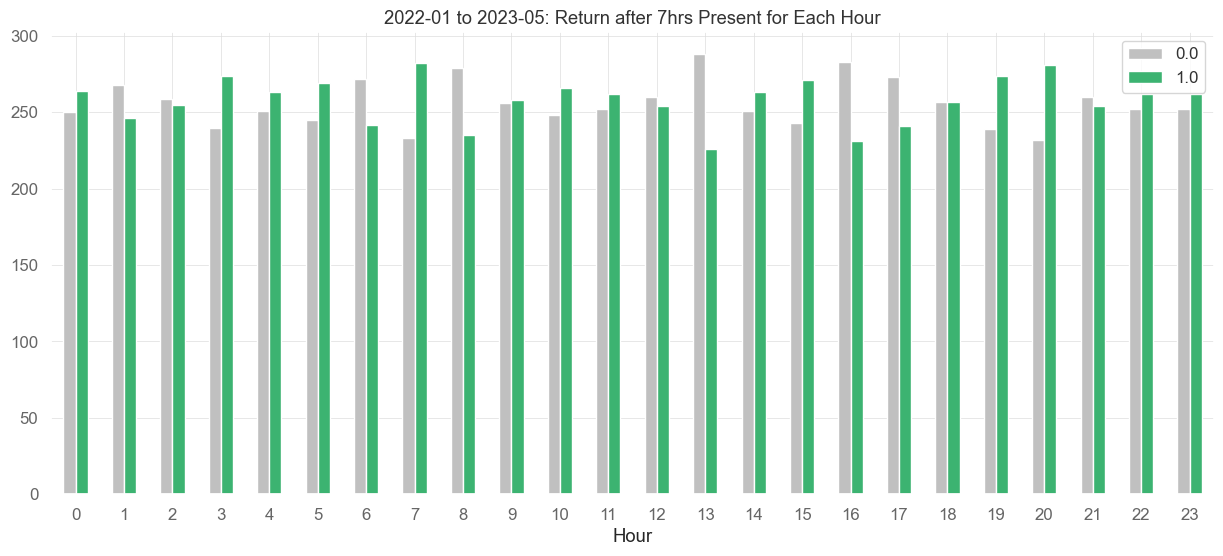

In [13]:
hours_count_df = df.groupby([df.index.hour, 'y'])[[
    'y'
]].count().unstack()

hours_count_df.columns = hours_count_df.columns.droplevel()

hours_count_df.reset_index(inplace=True)
hours_count_df.drop(columns=['datetime'], axis=1, inplace=True)
hours_count_df.columns.name = None

start_date = df.index[0].strftime('%Y-%m')
end_date = df.index[-1].strftime('%Y-%m')

# visualization
ax = hours_count_df.plot(kind="bar", figsize=(15, 6)
                         , title=f"{start_date} to {end_date}: Return after 7hrs Present for Each Hour"
                         , color=['silver', 'mediumseagreen']
                         , xlabel="Hour"
                         )

plt.xticks(rotation=0) 
plt.show()

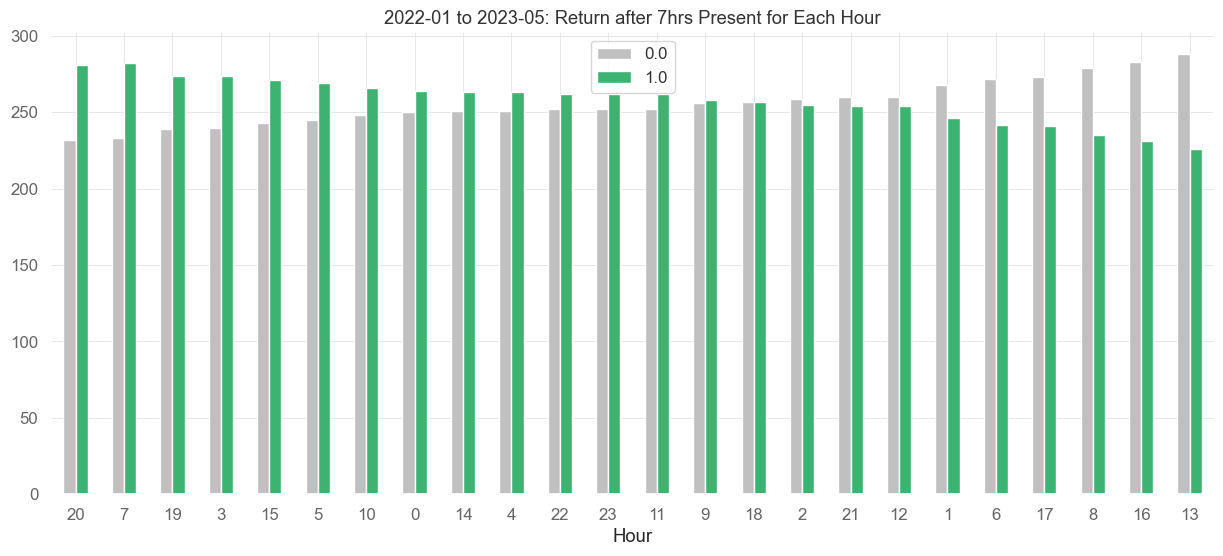

In [14]:
hours_count_df["diff"] = hours_count_df[1] - hours_count_df[0]

hours_count_df.sort_values('diff', ascending=False)[[0, 1]].plot(kind="bar", figsize=(15, 6)
                         , title=f"{start_date} to {end_date}: Return after 7hrs Present for Each Hour"
                         , color=['silver', 'mediumseagreen']
                         , xlabel="Hour"
                         )

plt.xticks(rotation=0) 
plt.show()

Text(0.5, 0.98, 'Price directions for the next 7hrs during the period of 2022-01 to 2023-05')

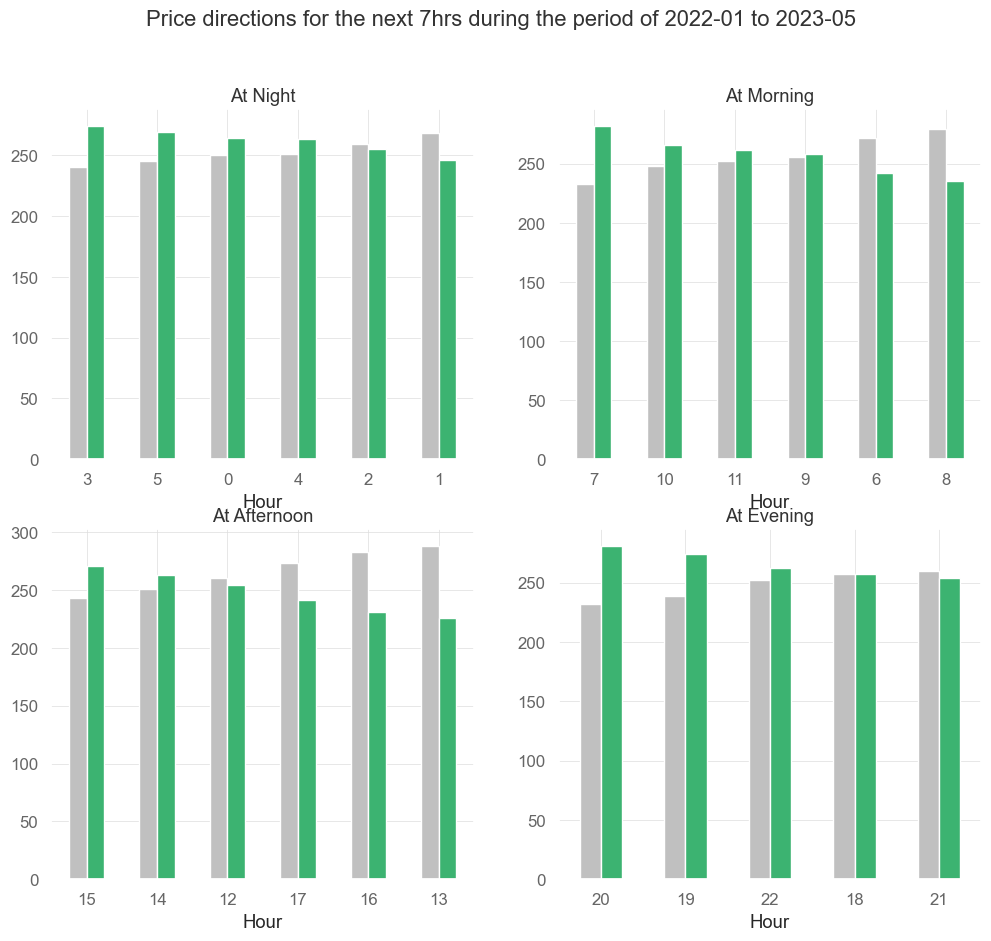

In [15]:
# Price direction 7hrs Group by Time Period
time_period_labels = ['Night', 'Morning', 'Afternoon', 'Evening']
hours_count_df['time_period'] = pd.cut(hours_count_df.index, bins=[0, 6, 12, 18, 23], labels=time_period_labels, right=False)

# Create a figure and subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each time period and plot the corresponding data
for i, label in enumerate(time_period_labels):
    ax = axes[i]
    df_label = hours_count_df[hours_count_df['time_period'] == label].sort_values('diff', ascending=False)[[0, 1]]
    df_label.plot(kind="bar", ax=ax, title=f"At {label}",
                  color=['silver', 'mediumseagreen'], xlabel="Hour")
    ax.legend().set_visible(False)  # Hide the legend for each subplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # set rotate

fig.suptitle('Price directions for the next 7hrs during the period of 2022-01 to 2023-05')

**Ideas**
- feature เกี่ยวกับเวลาช่วงใดควรเล่น กับไม่ควรเล่น

In [16]:
# select feature
df_select_columns = df.iloc[:, 23:] # except original indicators and OHLC
df_select_columns['close'] = df['close']


df_select_columns.dropna(inplace=True)

X = df_select_columns.drop(columns=['close', 'y'])
y = df_select_columns['y']

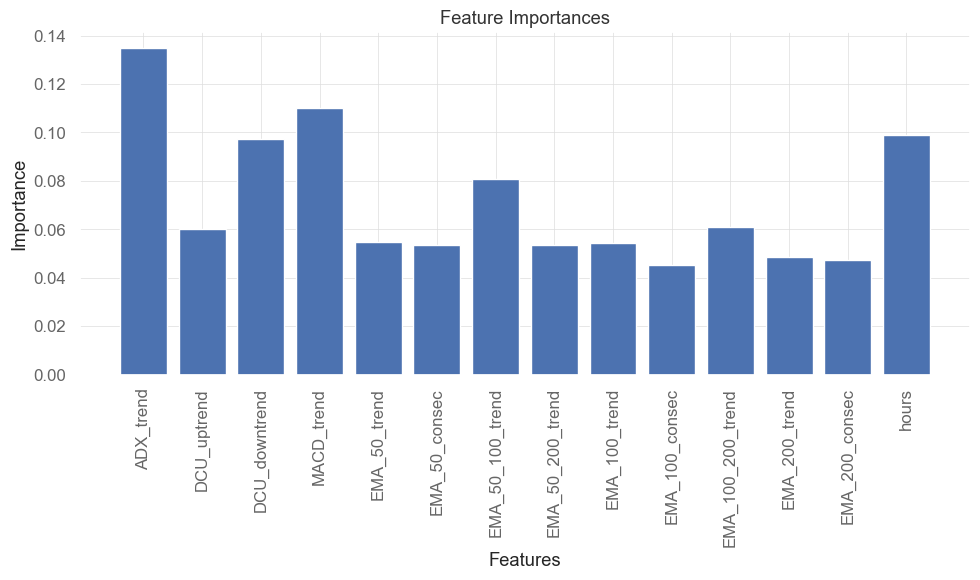

In [17]:
# Assuming you have features X and labels y
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align='center')
plt.xticks(range(len(importances)), model.feature_names_in_, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [18]:
# The training and validation datasets are utilized to explore and determine the optimal methodology
# The testing dataset, which represents unseen data, is then used once the best result has been achieved on the training and validation datasets.
X_train_val, X_test = X.iloc[:-rows_out_of_sample], X.iloc[-rows_out_of_sample:]
y_train_val, y_test = y.iloc[:-rows_out_of_sample], y.iloc[-rows_out_of_sample:]

## Split Train/Validation Dataset

In [19]:
n_splits = 5

# training for 1 month
# week * hrs
train_size = 28*24

# validation for 1 week
test_size = 7*24

In [20]:
rf = RandomForestClassifier(random_state=42)

tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size)

# Perform cross-validation on the data
for k_fold, (X_train_val_index, y_train_val_index) in enumerate(tscv.split(X_train_val)) :
    # X_train_val = raw_indicators.iloc[X_train_val_index]
    # y_train_val = raw_indicators.iloc[y_train_val_index]
    train_data = X_train_val.iloc[X_train_val_index]
    test_data = X_train_val.iloc[y_train_val_index]
    print('--------------------')
    # number of fold
    print('Fold: ', k_fold+1)
    # Print the shapes of the training and testing sets for each fold
    print('Training data shape:', train_data.shape)
    print('Testing data shape:', test_data.shape)

    # Print the period of the training and testing sets for each fold 
    print('Training date:', train_data.index[0], "-", train_data.index[-1])
    print('Testing date:', test_data.index[0], "-", test_data.index[-1])

--------------------
Fold:  1
Training data shape: (10062, 14)
Testing data shape: (168, 14)
Training date: 2022-01-09 14:00:00 - 2023-03-04 19:00:00
Testing date: 2023-03-04 20:00:00 - 2023-03-11 19:00:00
--------------------
Fold:  2
Training data shape: (10230, 14)
Testing data shape: (168, 14)
Training date: 2022-01-09 14:00:00 - 2023-03-11 19:00:00
Testing date: 2023-03-11 20:00:00 - 2023-03-18 19:00:00
--------------------
Fold:  3
Training data shape: (10398, 14)
Testing data shape: (168, 14)
Training date: 2022-01-09 14:00:00 - 2023-03-18 19:00:00
Testing date: 2023-03-18 20:00:00 - 2023-03-25 21:00:00
--------------------
Fold:  4
Training data shape: (10566, 14)
Testing data shape: (168, 14)
Training date: 2022-01-09 14:00:00 - 2023-03-25 21:00:00
Testing date: 2023-03-25 22:00:00 - 2023-04-01 21:00:00
--------------------
Fold:  5
Training data shape: (10734, 14)
Testing data shape: (168, 14)
Training date: 2022-01-09 14:00:00 - 2023-04-01 21:00:00
Testing date: 2023-04-01 2

## Normalization

In [21]:
normalizers = [
    ('scaler', None),
    ('scaler', RobustScaler()),
    ('scaler', MinMaxScaler()),
    ('scaler', StandardScaler())
]

for i, normalizer in enumerate(normalizers):
    pipeline = Pipeline([
        normalizer,
        ('rf', RandomForestClassifier(random_state=42))
    ])

    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size)

    score = cross_val_score(pipeline, X_train_val, y_train_val, scoring='roc_auc', cv=tscv)
    print("---------------------------")
    print(f'Normalizer: {type(normalizers[i][1]).__name__}')
    print('{}: {:.4f} +- {:.4f}'.format(type(pipeline).__name__, score.mean(), score.std()))
    print(score)

---------------------------
Normalizer: NoneType
Pipeline: 0.4991 +- 0.0443
[0.50909091 0.522062   0.50481928 0.54440789 0.41494809]
---------------------------
Normalizer: RobustScaler
Pipeline: 0.4991 +- 0.0443
[0.50909091 0.522062   0.50481928 0.54440789 0.41494809]
---------------------------
Normalizer: MinMaxScaler
Pipeline: 0.4991 +- 0.0443
[0.50909091 0.522062   0.50481928 0.54440789 0.41494809]
---------------------------
Normalizer: StandardScaler
Pipeline: 0.4991 +- 0.0443
[0.50909091 0.522062   0.50481928 0.54440789 0.41494809]


Select the Best Normalizer

1. estimator
2. learning curve ของโมเดล

In [22]:
# Define a parameter grid for the Random Forest model
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size)

grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=tscv)
grid_search.fit(X_train_val, y_train_val)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Best score:  0.5165497355190999


In [23]:
# auc score
grid_search.score(X_train_val, y_train_val)

0.5775452268346306

## Out of Sample

In [24]:
signal_df = X_test.copy()
signal_df['signal'] = pd.Series(data=grid_search.predict(X_test), index=X_test.index)

# convert signal as boolean
signal_df['signal'] = signal_df['signal'].apply(lambda x: True if x==1 else False)

# more realistic
signal_df['signal'] = signal_df['signal'].shift()
signal_df.dropna(inplace=True)

# create signal backtesting
signal_vectorbt = signal_df.ta.tsignals(signal_df.signal, asbool=True, append=True)

# close price
close_price = strat1.loc[signal_df.index[0]:signal_df.index[-1]]['close']

port = vbt.Portfolio.from_signals(close_price,
                                    entries=signal_vectorbt.TS_Entries,
                                    exits=signal_vectorbt.TS_Exits,
                                    freq="1h",
                                    init_cash = 1000,
                                    size=0.1,
                                    # fees = 0.00075,     # 0.075% (BNB 25% off)
                                    # slippage = 0.001    # 0.1%
                                )

port.plot().show()
port.stats()

Start                               2023-04-08 23:00:00
End                                 2023-05-30 07:00:00
Period                                 51 days 09:00:00
Start Value                                      1000.0
End Value                                    949.353357
Total Return [%]                              -5.064664
Benchmark Return [%]                          -1.046263
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              13.384232
Max Drawdown Duration                  45 days 15:00:00
Total Trades                                        249
Total Closed Trades                                 249
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  47.791165
Best Trade [%]                                 2.559311
Worst Trade [%]                               -3